## Notebook d'analyse - Projet 3 - David Depouez

### 1. Importation et selection

Importation des modules et lecture du fichier de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
path = "./data/source/"
filename = "2016_Building_Energy_Benchmarking.csv"

df = pd.read_csv(path+filename)
df.shape

(3376, 46)

In [3]:
useDistrict = False

In [4]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


On regarde le type des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

On enlève les colonnes comprenant qu'un seul type de valeur ou alors des valeurs toutes différentes

In [6]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [7]:
temp = df.nunique()
colsWithUniqueValue = [i for i in temp.index if temp[i] == 1 or temp[i] == df.shape[0]]
df.drop(columns=colsWithUniqueValue,inplace=True)

On enlève les colonnes avec plus de 50% de valeurs manquantes

<AxesSubplot:>

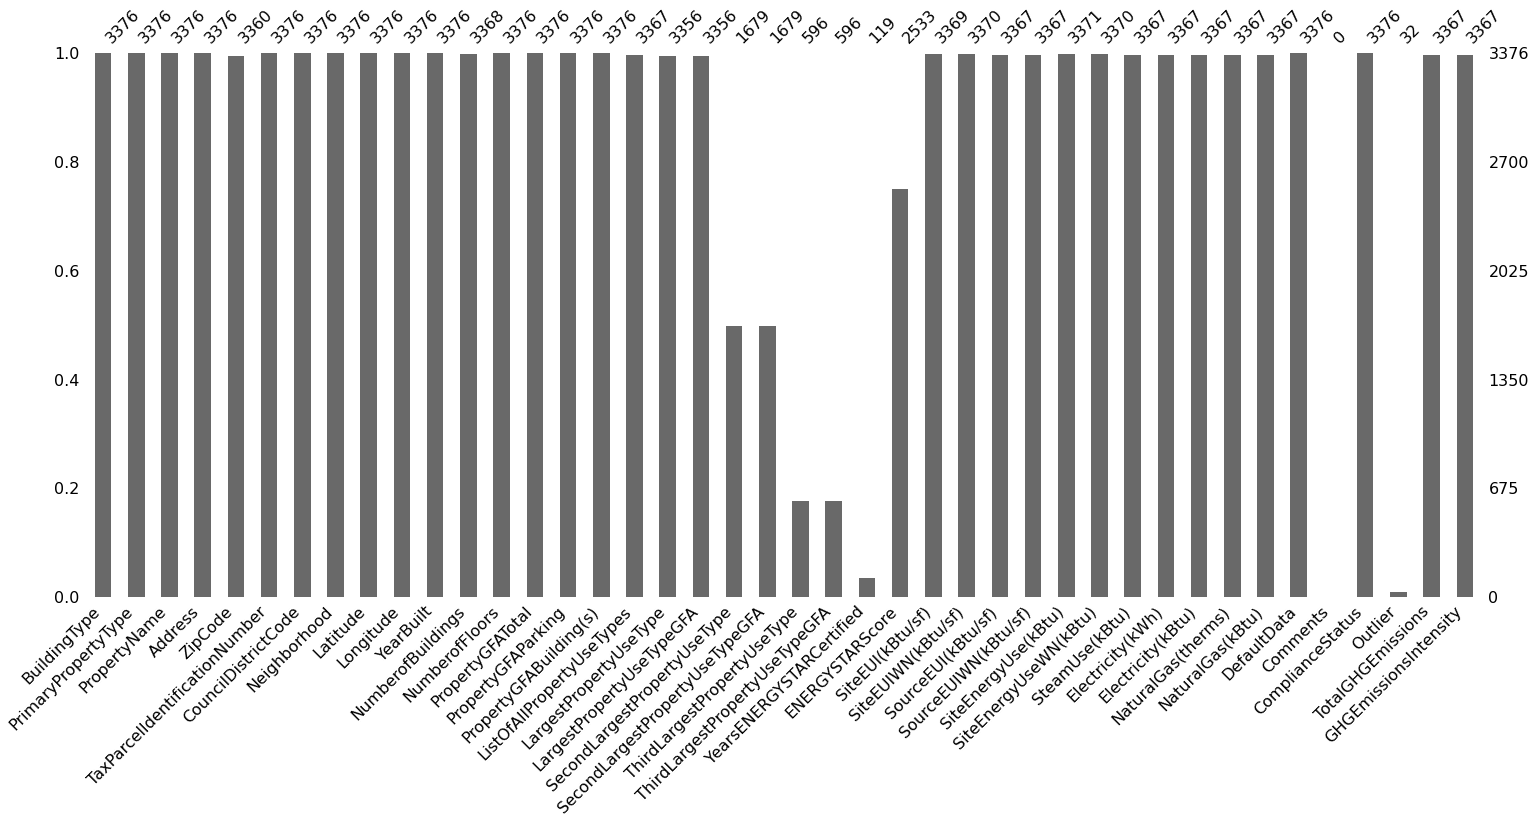

In [8]:
msno.bar(df)

In [9]:
df = df.dropna(thresh=len(df) / 2, axis=1)

On enlève les individus qui sont destinés à un usage familal

In [10]:
df['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [11]:
mask = df['BuildingType'].str.contains('Multifamily')
df = df.loc[mask == False,:]

On supprime les colonnes non pertinentes pour notre analyse

In [12]:
df = df.drop(['PropertyName','ComplianceStatus','DefaultData','PropertyGFAParking'],axis=1)

In [13]:
df = df.drop(['ListOfAllPropertyUseTypes','LargestPropertyUseType','BuildingType','GHGEmissionsIntensity'],axis=1)

On cherche s'il y a des doublons

In [14]:
df.duplicated().value_counts()

False    1668
dtype: int64

On affiche le graphique des correlations (HeatMap)

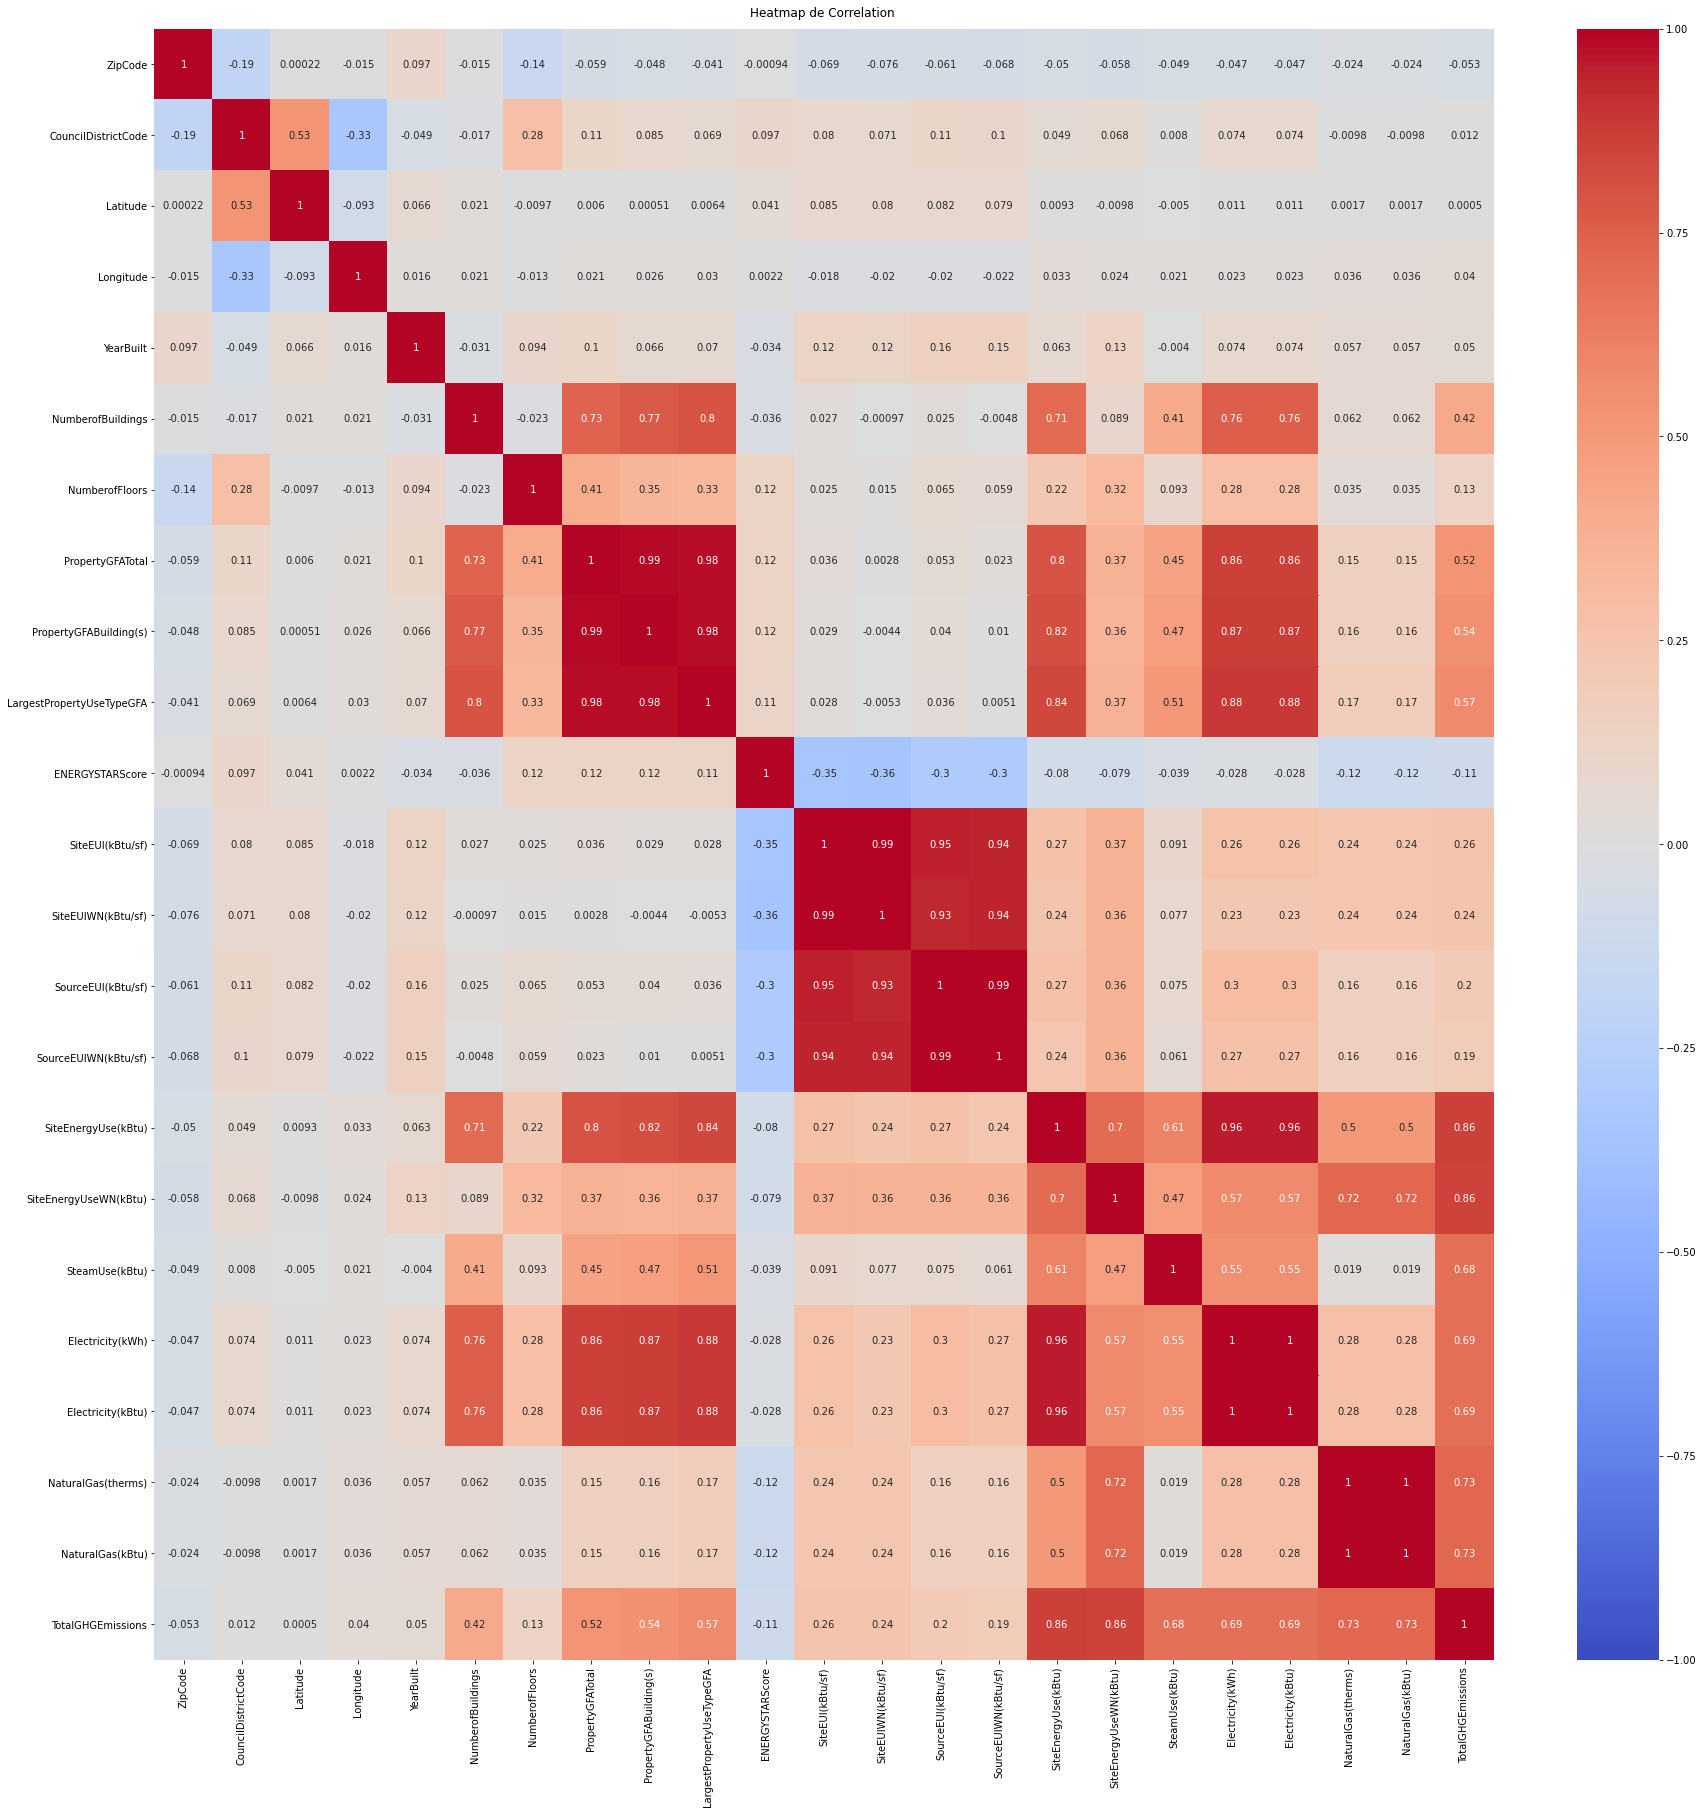

In [15]:
import seaborn as sns
plt.figure(figsize=(30, 30))


heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='coolwarm');
heatmap.set_title('Heatmap de Correlation ', fontdict={'fontsize':12}, pad=12);

On supprime les colonnes avec grande corrélation

In [16]:
colsWithStrongCor = ['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)', 'Electricity(kWh)','NaturalGas(therms)',
                     'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']
df.drop(columns=colsWithStrongCor,inplace=True)

La cible en energie choisie est SiteEnergyUse(kBtu). On supprime les colonnes liés (intensité et moyennes)

In [17]:
df = df.drop(['SiteEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)'],axis=1)

Les deux cibles sont les variables suivantes:

In [18]:
target1 = 'SiteEnergyUse(kBtu)'
target2 = 'TotalGHGEmissions'

### 2. Analyse et sélection des variables de localisation

Carte representant la distribution des district Code 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

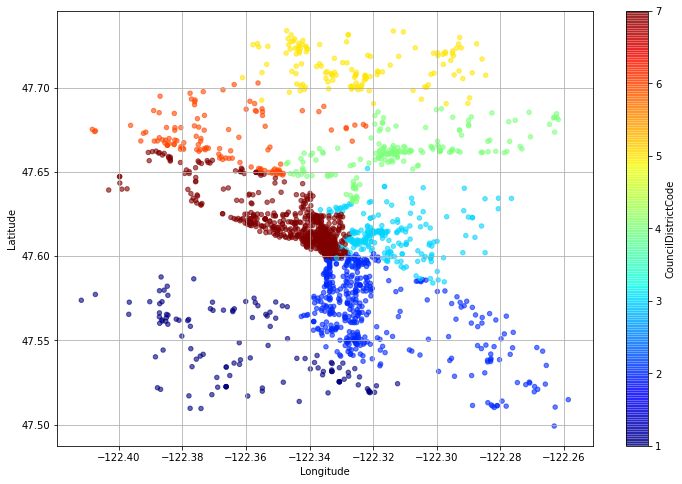

In [22]:
df.plot(kind='scatter', x='Longitude', y='Latitude',grid=True,figsize=(12,8),alpha=0.6,
        c='CouncilDistrictCode',colorbar=True,cmap="jet",sharex=False)

Mise en forme pour downstream

In [23]:
df['Neighborhood'].value_counts()

DOWNTOWN                  361
GREATER DUWAMISH          346
MAGNOLIA / QUEEN ANNE     151
LAKE UNION                148
NORTHEAST                 128
EAST                      121
NORTHWEST                  81
BALLARD                    64
NORTH                      58
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [24]:
df['Neighborhood'] = df['Neighborhood'].str.upper()

In [25]:
mask = df['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS'
df.loc[mask == True,'Neighborhood'] = 'DELRIDGE'

In [26]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
neighbCode = enc.fit_transform(df['Neighborhood'])
#enc.classes_
neighbCode = list(neighbCode)
df['Neighborhood Code'] = neighbCode

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

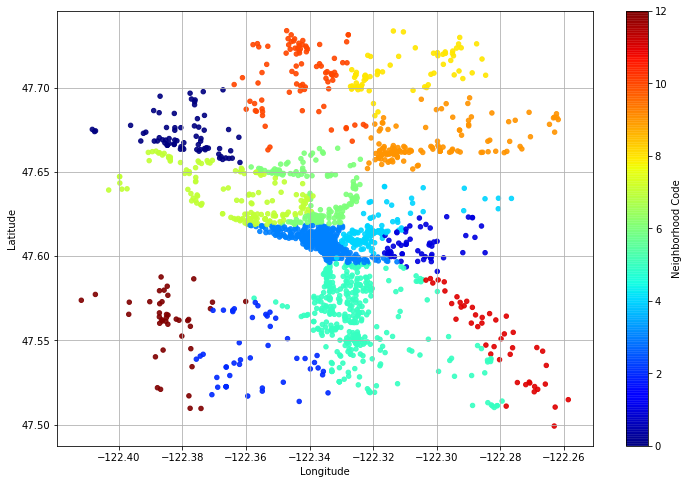

In [27]:
df.plot(kind='scatter', x='Longitude', y='Latitude',grid=True,figsize=(12,8),alpha=0.9,
        c='Neighborhood Code',colorbar=True,cmap="jet",sharex=False)

On garde une variable et on supprime les autres colonnes liées à la localisation

In [28]:
df = df.drop(['Neighborhood Code'],axis=1)
if useDistrict == True:
    df = df.drop(['Address', 'TaxParcelIdentificationNumber', 'ZipCode', 'Neighborhood','Latitude', 'Longitude'],axis=1)
else:
    df = df.drop(['Address', 'TaxParcelIdentificationNumber', 'ZipCode', 'CouncilDistrictCode','Latitude', 'Longitude'],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PrimaryPropertyType  1668 non-null   object 
 1   Neighborhood         1668 non-null   object 
 2   YearBuilt            1668 non-null   int64  
 3   NumberofBuildings    1666 non-null   float64
 4   NumberofFloors       1668 non-null   int64  
 5   PropertyGFATotal     1668 non-null   int64  
 6   ENERGYSTARScore      1094 non-null   float64
 7   SourceEUI(kBtu/sf)   1666 non-null   float64
 8   SiteEnergyUse(kBtu)  1666 non-null   float64
 9   SteamUse(kBtu)       1666 non-null   float64
 10  Electricity(kBtu)    1666 non-null   float64
 11  NaturalGas(kBtu)     1666 non-null   float64
 12  TotalGHGEmissions    1666 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 182.4+ KB


### 3. Analyse des cibles

Fonction pour afficher un histogramme personalisé

In [30]:
def getHistogramme(dataFrame, colName, title=None,xlog=None,ylog=None,isSigma=False,bins=10,isFreq=False) :
    ### function to display histogram then dump statistical relevant values ###
    plt.xlabel(colName)
    if isFreq == True:
        plt.ylabel('Fréquences')
    else:
        plt.ylabel('Occurences')
    if title != None:
        plt.title(title)
    dataFrame[colName].hist(density=isFreq,grid=False,stacked=True,bins=bins,figsize=(10,6))
    mean = dataFrame[colName].mean()
    median = dataFrame[colName].median()
    std = dataFrame[colName].std()
    plt.axvline(x=mean,color='red',linestyle='-',label='moyenne')
    plt.axvline(x=median,color='green',linestyle='-',label='mediane')
    if isSigma == True:
        plt.axvline(x=std,color='purple',linestyle='-',label=r'$\sigma$')
        plt.axvline(x=-std,color='purple',linestyle='-')
        plt.axvline(x=3*std,color='purple',linestyle='dotted',label=r'$3\sigma$')
        plt.axvline(x=-3*std,color='purple',linestyle='dotted')
    if xlog == True:
        plt.xscale('log')
    if ylog == True:
        plt.yscale('log')
    plt.legend()
    if mean != 0:
        print("{} : mean {:2.3} median {:2.3} std {:2.3} std/mean {:2.3}".format(colName,mean, median, std, std/mean))
    else:
        print("{} : mean {:2.3} median {:2.3} std {:2.3}".format(colName,mean, median, std))
    return (mean, median, std)

On enleve les valeurs négatives et nulles pour les cibles

In [31]:
targetList = [target1,target2]
for i in targetList:
    mask = df[i] <= 0
    #print(mask.value_counts())
    #print(df.loc[mask == True ,colsList[indice]].index)
    df.drop(df.loc[mask == True].index,inplace=True)

Energie

SiteEnergyUse(kBtu) : mean 8.52e+06 median 2.59e+06 std 3.04e+07 std/mean 3.57


(8522286.916719286, 2593202.75, 30396307.48377962)

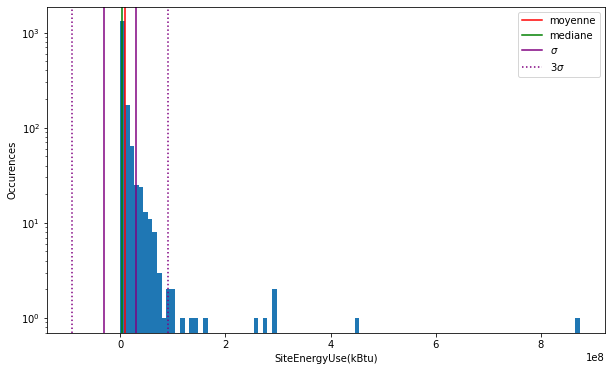

In [32]:
getHistogramme(df,target1,xlog=False,ylog=True,isSigma=True,bins=100)

In [33]:
df[target1].describe()

count    1.648000e+03
mean     8.522287e+06
std      3.039631e+07
min      1.680890e+04
25%      1.257589e+06
50%      2.593203e+06
75%      6.962459e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

GHGEmissions

TotalGHGEmissions : mean 1.87e+02 median 49.8 std 7.56e+02 std/mean 4.05


(186.51061286407787, 49.845, 755.8808372074031)

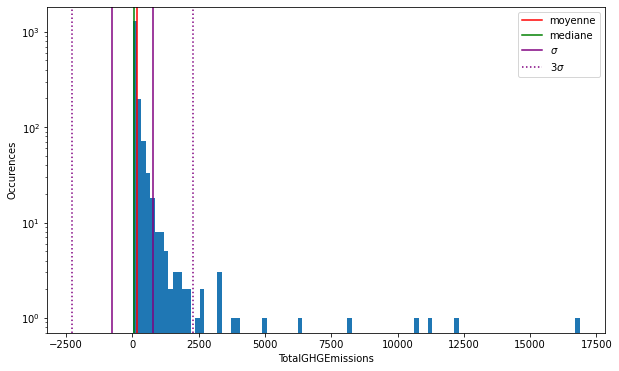

In [34]:
getHistogramme(df,target2,xlog=False,ylog=True,isSigma=True,bins=100)

In [35]:
df[target2].describe()

count     1648.000000
mean       186.510613
std        755.880837
min          0.120000
25%         20.475000
50%         49.845000
75%        143.607500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

### 4. Gestion des Outliers

Fonctions pour gérer les outliers :

In [36]:
# Functions to handle outliers
def getQuantiles(dFrame,colName,lower=0.25,higher=0.75,isLog=False) :
    ### Get values corresponding to quartiles (defaults are for Q1 and Q3)###
    low,high = dFrame[colName].quantile([lower,higher])
    if isLog == True:
        print("For quantile {} val={:2.3} and for quantile {} val={:2.3}".format(lower,low,higher,high))
    return (low,high)

def computeTukeyMinMax(dFrame,colName,whis=1.5,isLog=False) :
    ### Get min and max corresponding to Tukey's Law (default whis is 1.5)###
    Q1, Q3 = getQuantiles(dFrame,colName)
    IQR = Q3 - Q1
    vmin = Q1 - whis*IQR
    if vmin < 0 :
        vmin = 0.0
    vmax = Q3 + whis*IQR
    if isLog == True:
        print("Q1 {:2.3} Q3 {:2.3} IQR {:2.3} vmin {:2.3} vmax {:2.3}".format(Q1,Q3,IQR,vmin,vmax))
    return (vmin,vmax)

def displayOutliers(dFrame,colName,isDump=False,isLog=False) :
    ### Display outliers and according boxplot based on Tukey's law ###
    vmin, vmax = computeTukeyMinMax(dFrame,colName)
    mask = (dFrame[colName] > vmax) | (dFrame[colName] < vmin)
    nbOutliers = len(dFrame.loc[mask == True , :])
    if nbOutliers != 0 and isDump == True:
        display(dFrame.loc[mask == True ,[colName]].sort_values(by=colName,ascending=False))
    dFrame.boxplot(column = colName, grid = False)
    if isLog == True:
        print("{} Outliers, vmin {:2.3} vmax {:2.3}".format(nbOutliers,vmin,vmax))
    return (vmin,vmax,nbOutliers)

#dFrame[colName].clip(lower=low,upper=up,inplace=True)

Reduction des Outliers pour les features suivantes

In [37]:
reductionList = ['SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']

In [38]:
for i in reductionList:
    valMin, valMax = computeTukeyMinMax(df,i,isLog=False)
    df[i].clip(lower=valMin,upper=valMax,inplace=True)

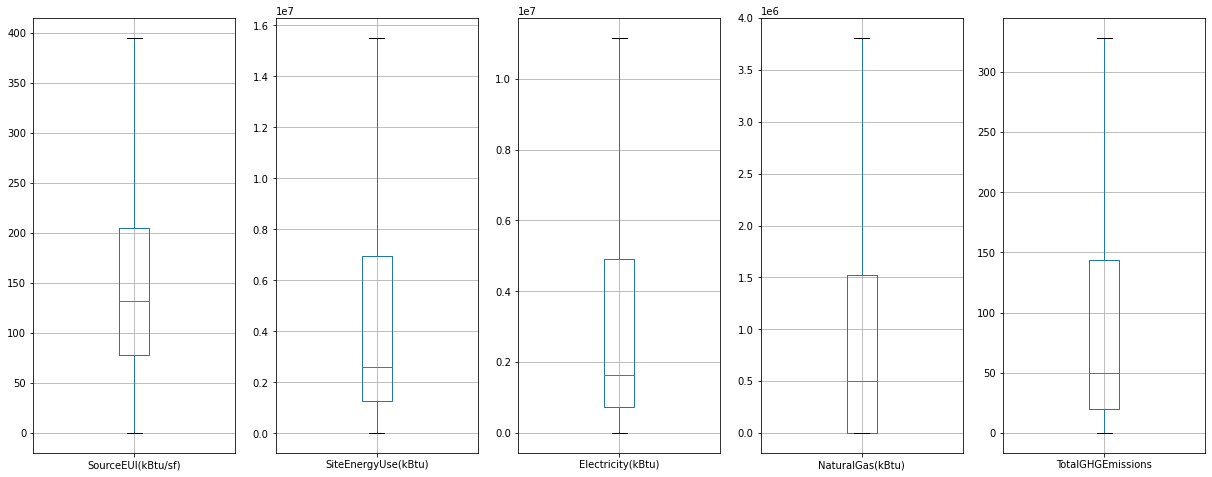

In [39]:
fig, axes = plt.subplots(1,5,figsize=(21, 8))

for i,el in enumerate(reductionList):
    #a = df.boxplot(el, ax=axes.flatten()[i])
    #valMin, valMax, nbOutliers = displayOutliers(df,el)
    a = df.boxplot(el, ax=axes.flatten()[i])

plt.show()

### 5. Valeurs manquantes

In [40]:
df.isna().sum()

PrimaryPropertyType      0
Neighborhood             0
YearBuilt                0
NumberofBuildings        2
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        559
SourceEUI(kBtu/sf)       2
SiteEnergyUse(kBtu)      2
SteamUse(kBtu)           2
Electricity(kBtu)        2
NaturalGas(kBtu)         2
TotalGHGEmissions        2
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PrimaryPropertyType  1650 non-null   object 
 1   Neighborhood         1650 non-null   object 
 2   YearBuilt            1650 non-null   int64  
 3   NumberofBuildings    1648 non-null   float64
 4   NumberofFloors       1650 non-null   int64  
 5   PropertyGFATotal     1650 non-null   int64  
 6   ENERGYSTARScore      1091 non-null   float64
 7   SourceEUI(kBtu/sf)   1648 non-null   float64
 8   SiteEnergyUse(kBtu)  1648 non-null   float64
 9   SteamUse(kBtu)       1648 non-null   float64
 10  Electricity(kBtu)    1648 non-null   float64
 11  NaturalGas(kBtu)     1648 non-null   float64
 12  TotalGHGEmissions    1648 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 180.5+ KB


On sépare les colonnes de chaines de caractère des autres

In [42]:
dfBackup = df.select_dtypes(include=['object'])
dfReduct = df.select_dtypes(exclude=['object'])

On applique un kNN sur les variables numériques

In [43]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [44]:
X = dfReduct.to_numpy()
imputer.fit(X)
XTransf = imputer.transform(X)
XTransf.shape

(1650, 11)

In [45]:
col = dfReduct.columns.tolist()
lines = dfReduct.index.tolist()
dfReduct = pd.DataFrame(XTransf,
                 index=lines,
                 columns=col)

On reconstitue le dataframe

In [46]:
df = pd.concat([dfBackup,dfReduct],axis=1)
df.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
0,Hotel,DOWNTOWN,1927.0,1.0,12.0,88434.0,60.0,182.500000,7.226362e+06,2003882.00,3946027.00,1276453.0,249.98000
1,Hotel,DOWNTOWN,1996.0,1.0,11.0,103566.0,61.0,176.100006,8.387933e+06,0.00,3242851.00,3810605.0,295.86000
2,Hotel,DOWNTOWN,1969.0,1.0,41.0,956110.0,43.0,241.899994,1.551976e+07,21566554.00,11157548.75,1493800.0,328.30625
3,Hotel,DOWNTOWN,1926.0,1.0,10.0,61320.0,56.0,216.199997,6.794584e+06,2214446.25,2768924.00,1811213.0,286.43000
4,Hotel,DOWNTOWN,1980.0,1.0,18.0,175580.0,75.0,211.399994,1.417261e+07,0.00,5368607.00,3810605.0,328.30625


<AxesSubplot:>

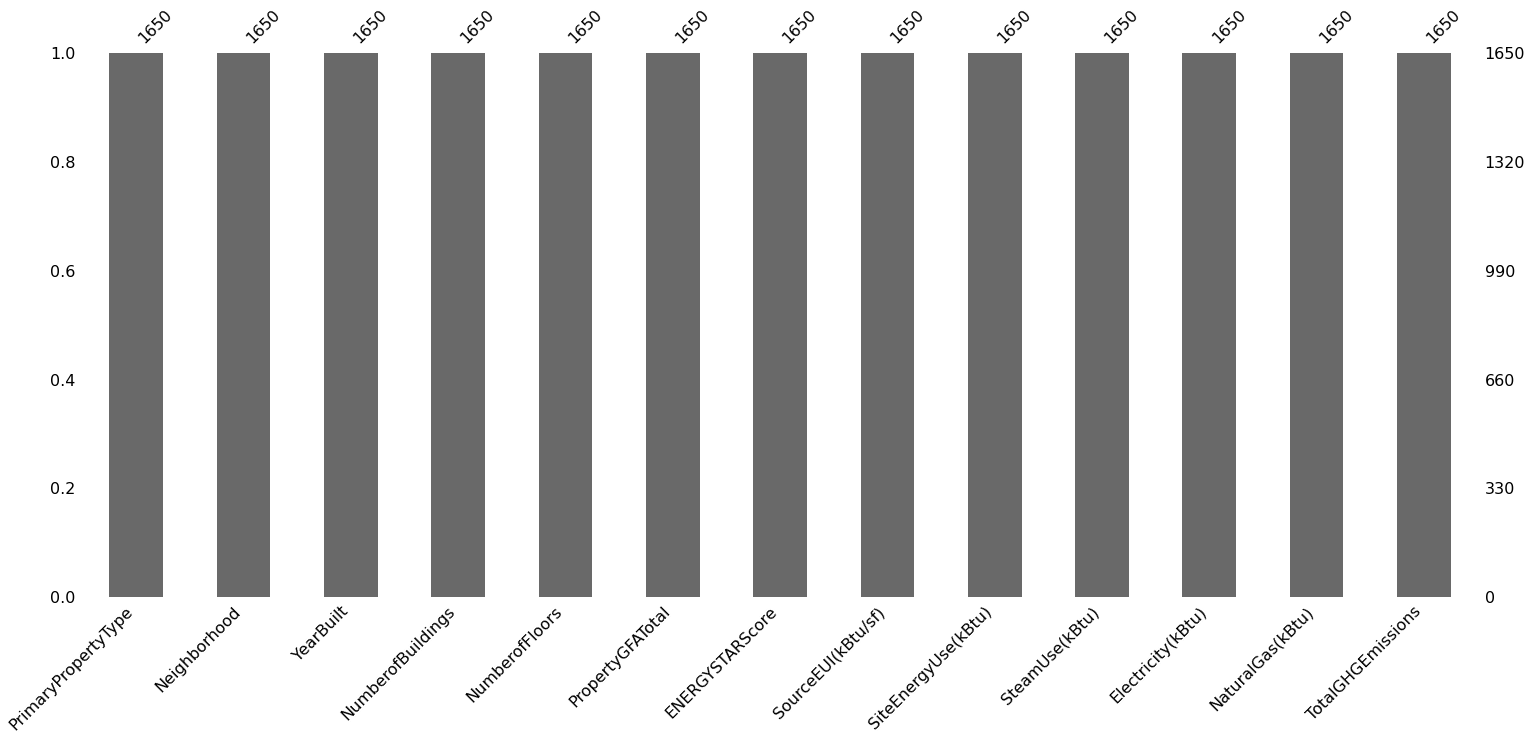

In [47]:
msno.bar(df)

### 6. Histogrammes des différentes colonnes

array([[<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofBuildings'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>],
       [<AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>,
        <AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SteamUse(kBtu)'}>,
        <AxesSubplot:title={'center':'Electricity(kBtu)'}>],
       [<AxesSubplot:title={'center':'NaturalGas(kBtu)'}>,
        <AxesSubplot:title={'center':'TotalGHGEmissions'}>,
        <AxesSubplot:>]], dtype=object)

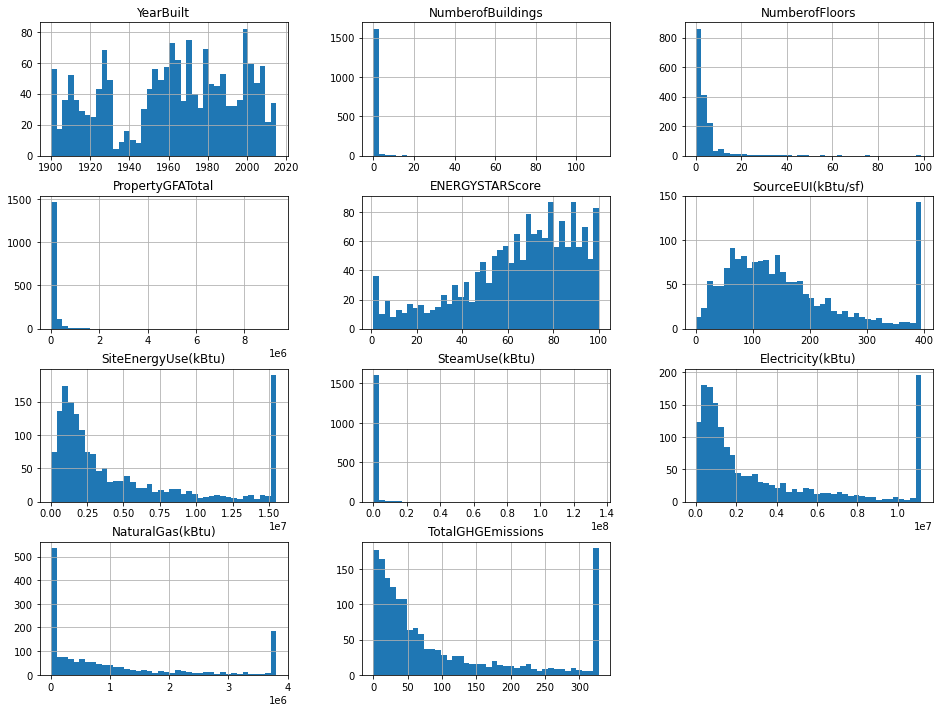

In [48]:
df.hist(bins=40,figsize=(16,12))

### 7. Passage au log de certaines variables 

In [49]:
from sklearn.preprocessing import FunctionTransformer

colsToTransform = ['NaturalGas(kBtu)','SteamUse(kBtu)','Electricity(kBtu)']

scale_tranformer = FunctionTransformer(np.log)
for feature in colsToTransform:
    #replace undefined 0 for log by value close to 0 ...
    mask = (df[feature] <= 0)
    df.loc[mask == True,feature] = 1E-1
    df[feature] = scale_tranformer.fit_transform(df[[feature]])

array([[<AxesSubplot:title={'center':'NaturalGas(kBtu)'}>,
        <AxesSubplot:title={'center':'SteamUse(kBtu)'}>],
       [<AxesSubplot:title={'center':'Electricity(kBtu)'}>,
        <AxesSubplot:>]], dtype=object)

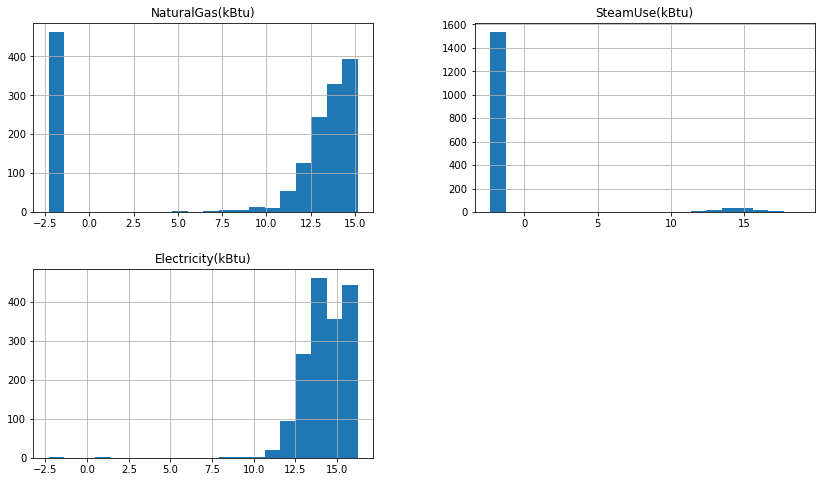

In [50]:
df.hist(column=colsToTransform,bins=20,figsize=(14,8))

### 8. On applique un One Hot Encoding sur les colonnes catégorielles

#### Sur la variable de localisation qui est numérique mais non ordonné

In [51]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

if useDistrict == True:
    varToTransform = 'CouncilDistrictCode'
else:
    varToTransform = 'Neighborhood'
    
transform = ohe.fit_transform(df[[varToTransform]])
df[ohe.categories_[0]] = transform.toarray()
df = df.drop([varToTransform],axis=1)

#### Sur le  PrimaryPropertyType

In [52]:
transform = ohe.fit_transform(df[['PrimaryPropertyType']])
df[ohe.categories_[0]] = transform.toarray()
df = df.drop(['PrimaryPropertyType'],axis=1)

### 9. On sauvegarde le Dataframe final

In [53]:
path = "data/cleaned/"

filename = 'Cleaned-' + filename

df.to_csv(path+filename, index=False)